# Cygnus X-1
# Example-File on How to Use the Spetral-Timing-Statistics–Modules
Python-code for Spectral Timing Analysis written by Ludvig Doeser (2021)

* Don't forget to check out the [summary notes](https://ludvigdoeser.github.io/pdfs/SpectralTimingAnalysis_Summary.pdf) or access pdf through the /doc/-directory.
* You will have to unzip the DATA! So go to the example/data/-directory and fix that first of all

In [1]:
from star import *

# Import FITS-file to Lightcurve-object directly:

-----------------------------------------------------------------------------------------------------------
               Importing lightcurve from f = Data/CygX1/cygx1_test_20ms_2to4keV.lc
-----------------------------------------------------------------------------------------------------------
Loading fits from filename:  Data/CygX1/cygx1_test_20ms_2to4keV.lc
The keys to the LIGHT CURVE data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'CONTENT', 'OBJECT'])
Loading fits done. 

Light curve object for CYGNUSX-1 in Eband = 2.0-4.0 keV created.
With parameters: N = 665400, dt = 0.02, R = 2.023e+03, and Fvar = 0.309.
-----------------------------------------------------------------------------------------------------------

Number of line segments of \approx 164s will be:  81


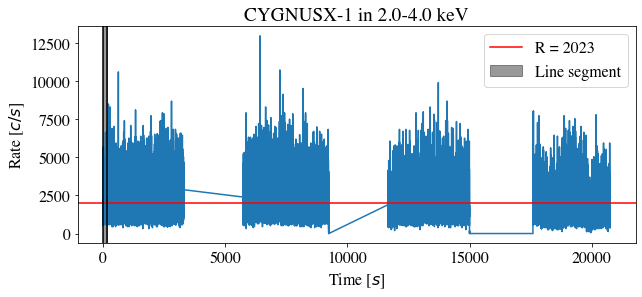

In [2]:
filename = 'Data/CygX1/cygx1_test_20ms_2to4keV.lc' 
lc = lightcurve(filename)
lc.plot(m=2**13,n=0)

**To print all attributes:**

In [3]:
pprint(vars(lc))

{'Emax': 4.0,
 'Emean': 3.0,
 'Emin': 2.0,
 'Fvar': 0.3089644061644621,
 'N': 665400,
 'OBJECT': 'CYGNUS_X-1',
 'R': 2022.64113014728,
 'deltaE': 1.0,
 'dt': 0.019999995827674866,
 'err': array([228.52570971, 247.87093416, 367.65200938, ..., 338.65616782,
       293.28484448, 293.28484448]),
 'fracexp': array([1.5625 , 0.78125, 0.78125, ..., 0.78125, 0.78125, 0.78125]),
 'object': 'CYGNUSX-1',
 'rate': array([1632.,  960., 2112., ..., 1792., 1344., 1344.]),
 't': array([0.00000000e+00, 1.99999958e-02, 4.00000066e-02, ...,
       2.07569400e+04, 2.07569600e+04, 2.07569800e+04])}


## Lightcurve methods

Number of line segments of \approx 164s will be:  81


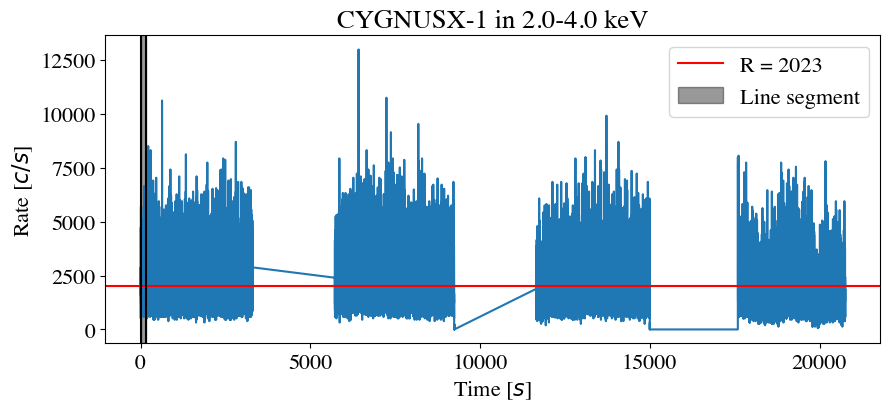

In [4]:
lc.plot(m=2**13,n=0)

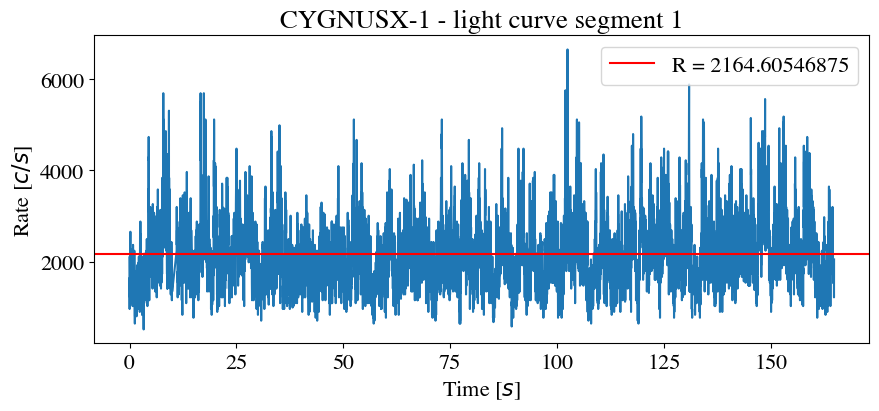

In [5]:
lc.extract_seg(m=2**13,n=0,to_plot=True)

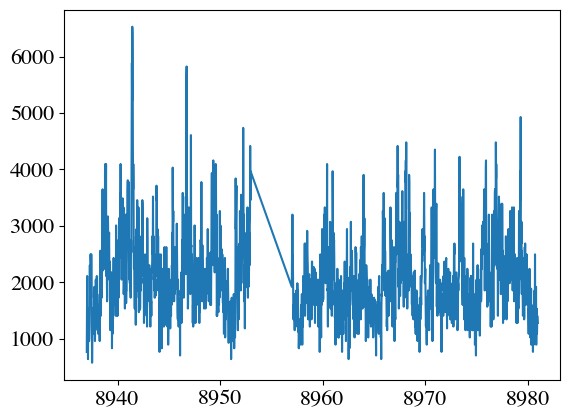

In [6]:
plt.plot(lc.t[326400-1000:326400+1000],lc.rate[326400-1000:326400+1000])
plt.show()

# Compute and Display Power Spectrum

In [7]:
ps = PowerSpectrum(lc, m=2**10, timer_on=False, noise='Gaussian', percent_limit=95, use_max_data=False) 
ps_max = PowerSpectrum(lc, m=2**10, timer_on=False, noise='Gaussian', percent_limit=95, use_max_data=True) 

Computing the power spectra using 1024 bins per segment, normalization "rms", and noise dist "Gaussian"...
8 of 649 segments were disregarded due to lower percent limit set to 95.00%:
Seg nr = 161, percent of filled time bins = 0.84
Seg nr = 197, percent of filled time bins = 83.66
Seg nr = 219, percent of filled time bins = 83.66
Seg nr = 318, percent of filled time bins = 83.66
Seg nr = 332, percent of filled time bins = 0.84
Seg nr = 423, percent of filled time bins = 83.66
Seg nr = 472, percent of filled time bins = 83.66
Seg nr = 495, percent of filled time bins = 0.78
Power spectra done! 

Computing the power spectra using 1024 bins per segment, normalization "rms", and noise dist "Gaussian"...
8 of 653 segments were disregarded due to lower percent limit set to 95.00%:
4 additional segments were used thanks to use_max_data == True
Seg nr = 161, percent of filled time bins = 0.84
Seg nr = 198, percent of filled time bins = 83.66
Seg nr = 220, percent of filled time bins = 83.66
S

In [8]:
# What does 'use_max_data' mean? Have a look at the documentation! 
help(PowerSpectrum)

Help on class PowerSpectrum in module star.Powerspectrum:

class PowerSpectrum(builtins.object)
 |  PowerSpectrum(lc, m=8192, normalization='rms', noise='Poisson', B_noise=0, percent_limit=90, timer_on=True, return_noise_wo_sub=False, save_all=False, use_max_data=True)
 |  
 |  Find the power spectrum by splitting the light curve into K segments. A power spectrum for 
 |  each segment is computed and the final power spectrum is the average over all these and the error
 |  is the standard error (sigma/K) over all these.
 |  
 |  **Parameters**:
 |  
 |  `lc`: class: 'Lightcurve'-object   
 |      The light curve data to be Fourier-transformed.
 |  
 |  `m`: int   
 |      Number of time bins per segment. 
 |  
 |  `normalization`: {'rms' (Miyamoto), 'abs', 'Leahy', or 'none'}, optional, default: 'rms'.     
 |      What normalization to use, see Vaughan(2003, MNRAS 345).
 |  
 |  `noise`: {'Poisson','Gaussian'}, optional, default: 'Poisson'.     
 |      For a light curve with 'Poisson'

The energy band is: 2.0-4.0 keV
The energy band is: 2.0-4.0 keV


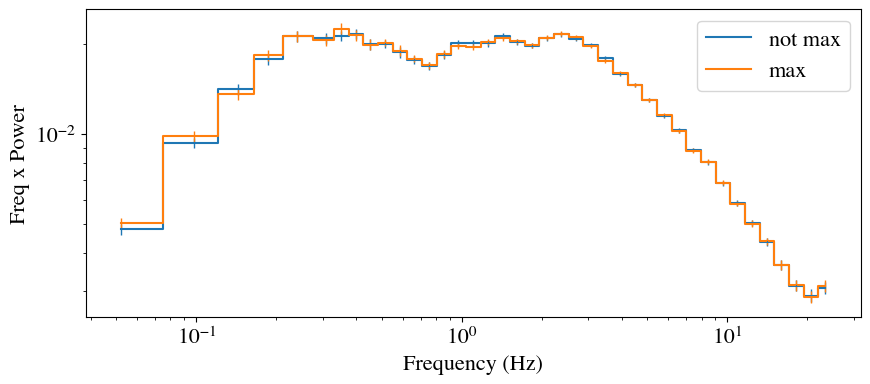

In [9]:
ps.plot(first=True,show=False,w=10,label='not max')
ps_max.plot(first=False,show=True,label='max')

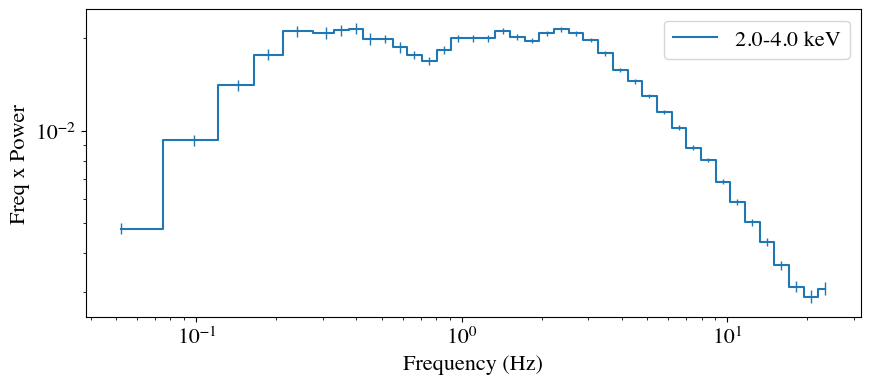

In [10]:
ps.plot('fPf') 

# Cross spectral properties

In [11]:
# Loading several files at once:
filenames = sorted(glob.glob('Data/CygX1/cygx1_nowak*.lc')) 

# Create light curve objects 
lc_v = [lightcurve(f,keywords=['MINCHAN','MAXCHAN'],p=0) for f in filenames]

# All combinations of lc_v
comb = [i for i in combinations(lc_v,2)]

-----------------------------------------------------------------------------------------------------------
               Importing lightcurve from f = Data/CygX1/cygx1_nowak0to3.9.lc
-----------------------------------------------------------------------------------------------------------
Loading fits from filename:  Data/CygX1/cygx1_nowak0to3.9.lc
There is no key MINCHAN in header0, let's have a look at header1.
Found key MINCHAN in header1.
There is no key MAXCHAN in header0, let's have a look at header1.
Found key MAXCHAN in header1.
The keys to the LIGHT CURVE data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'CONTENT', 'OBJECT', 'MINCHAN', 'MAXCHAN'])
Loading fits done. 

Light curve object for CYGNUSX-1 in Eband = 0.0-3.9 keV created.
With parameters: N = 7694000, dt = 0.002, R = 794.2, and Fvar = 0.2924.
-----------------------------------------------------------------------------------------------------------

----------------------------------------------------------

## Coherence Noiseless

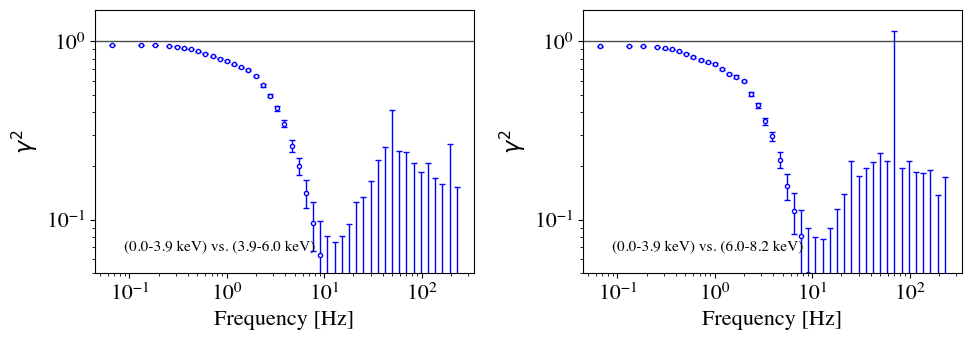

In [12]:
standard_plot(h=10,w=10)

for i in range(0,2):
    # Pick out two light curves each iteration
    lc1,lc2 = comb[i][0],comb[i][1]
    
    # Find coherence and rebin
    xf, gamma2, delta_gamma2, _ = coherence_noiseless([lc1,lc2],m=2**13)
    xf, gamma2, delta_gamma2 = log_rebin(xf,gamma2,delta_gamma2,num=50)

    # Plot
    plt.subplot(3,2,i+1)
    ax = plt.gca()
    ax.errorbar(xf,gamma2,yerr=delta_gamma2, fmt = '.b',mfc='w',capsize=2, elinewidth=1, markeredgewidth=1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.axhline(1,color='k',linewidth=1,alpha=0.7)
    ax.set_ylim([0.05,1.5])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('$\gamma^2$')
    
    Ebands = ('{}-{}'.format(lc1.Emin,lc1.Emax),'{}-{}'.format(lc2.Emin,lc2.Emax))
    Eband1, Eband2 = Ebands[0], Ebands[1]
    ax.text(0.33,0.1,'({} keV) vs. ({} keV)'.format(Eband1,Eband2),fontsize=11,horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    print('-------------------------------------------------------------------------------------------------------------------')
    
clear_output(True)
plt.tight_layout()
plt.show()

## Intrinsic Coherence

Do you want to plot the intrinsic coherence [y/n]? y


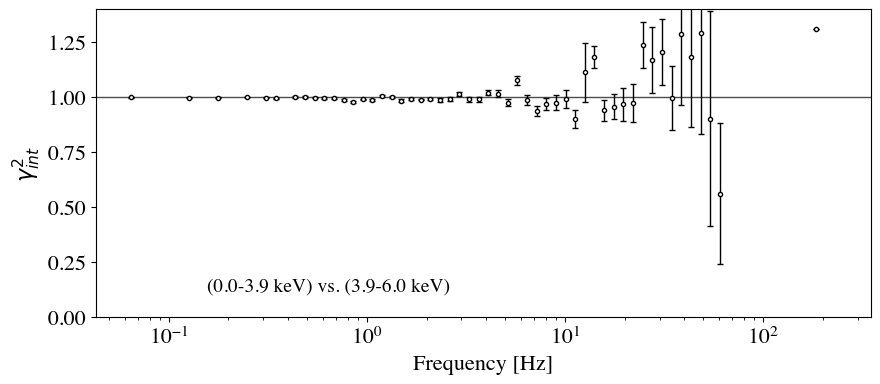

In [13]:
xf, gamma2, delta_gamma2_int = coherence_intrinsic([comb[0][0],comb[0][1]],m_init=2**13,noise='Gaussian',return_jointly=True)

## Time Lag

Do you want to plot the time lag [y/n]? y


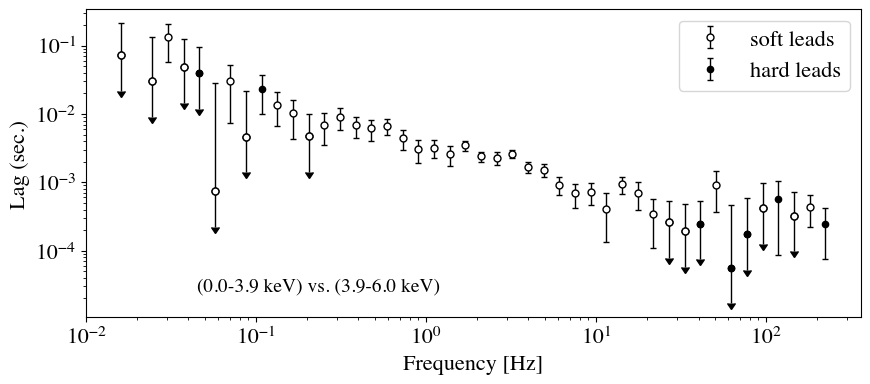

In [14]:
xf_v, tau_v, dtau_v = time_lag([comb[0][0],comb[0][1]],[2**8,2**12,2**16])

# RMS/Covariance vs Energy

In [15]:
ps_v = [PowerSpectrum(lc,m=2**13,noise='Gaussian',timer_on=False) for lc in lc_v]

Computing the power spectra using 8192 bins per segment, normalization "rms", and noise dist "Gaussian"...
22 of 955 segments were disregarded due to lower percent limit set to 90.00%:
16 additional segments were used thanks to use_max_data == True
Seg nr = 111, percent of filled time bins = 0.67
Seg nr = 112, percent of filled time bins = 0.67
Seg nr = 140, percent of filled time bins = 1.88
Seg nr = 141, percent of filled time bins = 1.88
Seg nr = 266, percent of filled time bins = 0.67
Seg nr = 267, percent of filled time bins = 0.67
Seg nr = 320, percent of filled time bins = 5.93
Seg nr = 321, percent of filled time bins = 5.93
Seg nr = 457, percent of filled time bins = 0.67
Seg nr = 458, percent of filled time bins = 0.67
Seg nr = 536, percent of filled time bins = 80.38
Seg nr = 537, percent of filled time bins = 80.38
Seg nr = 663, percent of filled time bins = 0.67
Seg nr = 664, percent of filled time bins = 0.67
Seg nr = 770, percent of filled time bins = 80.38
Seg nr = 771,

**Energies for each lc**:

In [16]:
energy_mid_v, energy_err_v = [], []
for lc in lc_v:
    energy_mid_v.append((lc.Emin+lc.Emax)/2)
    energy_err_v.append(lc.deltaE/2)

**Rms for each lc:**

In [17]:
lc_v_copy = [copy.deepcopy(lc) for lc in lc_v] 
freq_low, freq_high = 0.061, 249.938
rms_v, rms_err_v = rms_vs_energy(lc_v_copy,ps_v,m=2**13,freq_low=freq_low,freq_high=freq_high,units='rms')

---------------------------------------------------------------------------------------------------
                           Computing the rms...
---------------------------------------------------------------------------------------------------

Eband = 0.00-3.90 keV, Freq range = 0.061-249.938 Hz, rms_ps = 0.286 pm 0.001 (0.4% error)

Eband = 3.90-6.00 keV, Freq range = 0.061-249.938 Hz, rms_ps = 0.277 pm 0.001 (0.3% error)

Eband = 6.00-8.20 keV, Freq range = 0.061-249.938 Hz, rms_ps = 0.272 pm 0.001 (0.4% error)

Eband = 8.20-14.10 keV, Freq range = 0.061-249.938 Hz, rms_ps = 0.267 pm 0.001 (0.3% error)

---------------------------------------------------------------------------------------------------
                           Rms found (in 0.00 sec).
---------------------------------------------------------------------------------------------------


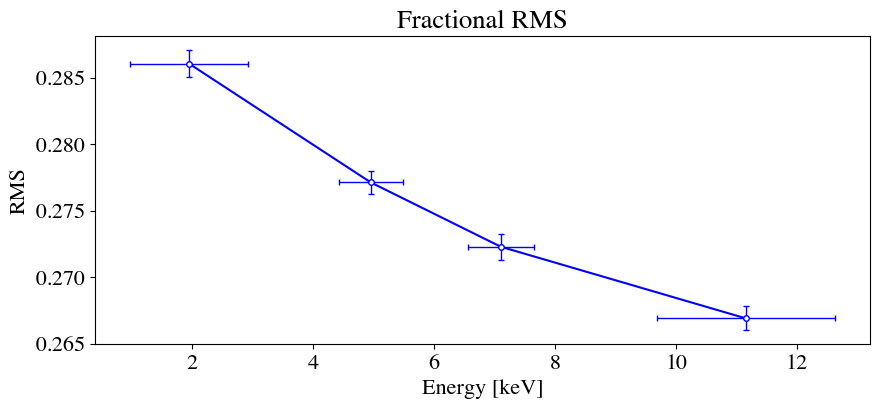

In [18]:
ax = standard_plot()
ax.errorbar(energy_mid_v,rms_v,xerr=energy_err_v,yerr=rms_err_v, fmt = '-ob',mfc='w',markersize=4,capsize=2, elinewidth=1, markeredgewidth=1,label='rms {}-{} Hz'.format(freq_low,freq_high))
plt.xlabel('Energy [keV]')
plt.ylabel('RMS')
plt.title('Fractional RMS')
plt.show()

**Cov for each lc (except ref band):**

In [19]:
lc_ref = lightcurve('Data/CygX1/cygx1_nowak0to3.9.lc')
lc_ref.Emin = 0
print(lc_ref.Emin,lc_ref.Emax)

-----------------------------------------------------------------------------------------------------------
               Importing lightcurve from f = Data/CygX1/cygx1_nowak0to3.9.lc
-----------------------------------------------------------------------------------------------------------
Loading fits from filename:  Data/CygX1/cygx1_nowak0to3.9.lc
The keys to the LIGHT CURVE data are: dict_keys(['TIME', 'RATE', 'ERROR', 'FRACEXP', 'CONTENT', 'OBJECT'])
Loading fits done. 

Light curve object for CYGNUSX-1 in Eband = 0.0-3.9 keV created.
With parameters: N = 7694000, dt = 0.002, R = 794.2, and Fvar = 0.2924.
-----------------------------------------------------------------------------------------------------------

0 3.9


In [20]:
# Note that the first light curve will not be accepted since it will be the same as the reference curve
cov, cov_err = covariance(lc_v,lc_ref,m=2**13,alt=2,noise='Gaussian',freq_low=None,freq_high=None,units='rms')

---------------------------------------------------------------------------------------------------
                           Covariance computation about to begin...
---------------------------------------------------------------------------------------------------

The light curves are the same! Try again.

---------------------------------------------------------------------------------------------------
                           Covariance computation about to begin...
---------------------------------------------------------------------------------------------------

Light curve 1: 3.9-6.0 keV
Light curve 2: 0-3.9 keV (this is the reference band)

---------------------------------------------------------------------------------------------------
                           Computing covariance segment-wise...
---------------------------------------------------------------------------------------------------

Computing the power spectra using 8192 bins per segment, normalization "

---------------------------------------------------------------------------------------------------
                           Computing covariance segment-wise...
---------------------------------------------------------------------------------------------------

Computing the power spectra using 8192 bins per segment, normalization "rms", and noise dist "Gaussian"...
22 of 955 segments were disregarded due to lower percent limit set to 90.00%:
16 additional segments were used thanks to use_max_data == True
Seg nr = 111, percent of filled time bins = 0.67
Seg nr = 112, percent of filled time bins = 0.67
Seg nr = 140, percent of filled time bins = 1.88
Seg nr = 141, percent of filled time bins = 1.88
Seg nr = 266, percent of filled time bins = 0.67
Seg nr = 267, percent of filled time bins = 0.67
Seg nr = 320, percent of filled time bins = 5.93
Seg nr = 321, percent of filled time bins = 5.93
Seg nr = 457, percent of filled time bins = 0.67
Seg nr = 458, percent of filled time bins = 0

**Plot:**

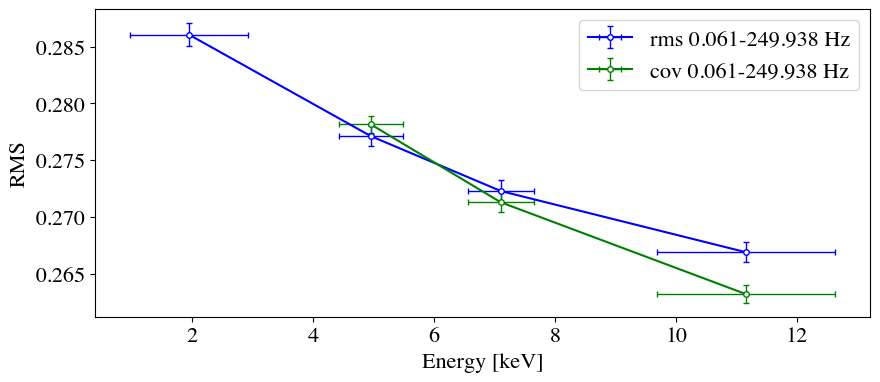

In [21]:
ax = standard_plot()
ax.errorbar(energy_mid_v,rms_v,xerr=energy_err_v,yerr=rms_err_v, fmt = '-ob',mfc='w',markersize=4,capsize=2, elinewidth=1, markeredgewidth=1,label='rms {}-{} Hz'.format(freq_low,freq_high))
# Next, for the covariance, we cannot plot for the first band (as we used it for the reference band):
ax.errorbar(energy_mid_v[1:],cov,xerr=energy_err_v[1:],yerr=cov_err, fmt = '-og',mfc='w',markersize=4,capsize=2, elinewidth=1, markeredgewidth=1,label='cov {}-{} Hz'.format(freq_low,freq_high))
plt.xlabel('Energy [keV]')
plt.ylabel('Normalized counts $s^{-1}$ keV$^{-1}$')
plt.ylabel('RMS')
plt.legend()
plt.show()